# Sprint 8: Visualization with Python

In this project, the objective is to duplicate a given visualization. We have the option to use Plotly or Seaborn to do it. 

We'll be using a dataset about a mock study of different diets for red squirrels.

This is the figure that we need to recreate:

![Red Squirrels Diet Study](figure_to_duplicate.png)

Let's get started.

## Libraries and the dataset

We'll need a few libraries.

- pandas: to manage the dataset.
- seaborn: to create the visualization.
- plotly express: we'll also create the visualization in plotly
- plotly.graph_objects: this gives us access to some customization options that we'll need

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Now read the dataset

In [2]:
# local data path
local_path = 'datasets/squirrel_diet.csv'

# Tripleten data path
server_path = '/datasets/squirrel_diet.csv'

try:
    df_squirrels = pd.read_csv(local_path)
    
except FileNotFoundError:
    df_squirrels = pd.read_csv(server_path)

Let's take a look at the data.

In [3]:
df_squirrels.info()
df_squirrels.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141


`sex` and `diet` are int. In our target figure, we see them displayed as `Male/Female` and `A/B/C`. 

Sex is easy to deduce. In the target figure we see that the squirrel with the most weight is male, and with the least weight is female. Also, they are both from diet `B`.

In [4]:
max_weight = df_squirrels['weight'].max()
min_weight = df_squirrels['weight'].min()

print('Heaviest squirrel:')
display(df_squirrels.query('weight == @max_weight'))
print('---------------------')
print('Lightest squirrel:')
display(df_squirrels.query('weight == @min_weight'))

Heaviest squirrel:


,sex,diet,weight
96,1,2,1.979


---------------------
Lightest squirrel:


,sex,diet,weight
38,0,2,0.681


`sex` is `0` for females, and `1` for males. Also, `diet 2` is `B`.

Very likely, diets 1-2-3 correspond to A-B-C in the figure. We can make sure by creating the plot and comparing the distribution of the data.

<AxesSubplot:xlabel='diet', ylabel='weight'>

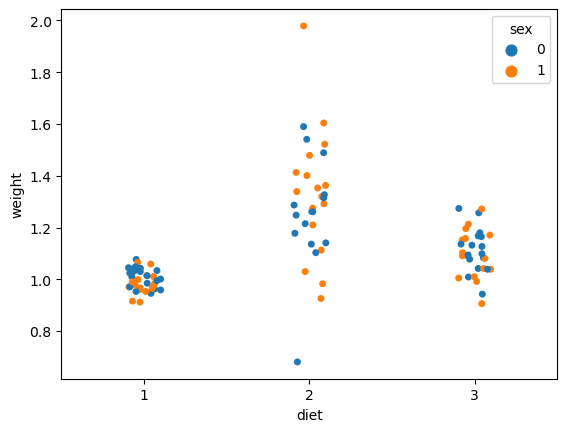

In [5]:
sns.stripplot(x='diet', y='weight', hue='sex', data=df_squirrels)

Yes, our assumption about the correspondence of 1-2-3 to A-B-C is correct.

## Charting in Seaborn

The general shape of the figure is correct. We just need to add a title, labels, legend, and pick the right colors.

In [6]:
title = 'Red Squirrel Diet Study'
x_lab = 'Diet Label'
y_lab = 'Adult Weight / lbs'
genders = {0:'Female', 1:'Male'} 
diets = {1:'A', 2:'B', 3:'C'} 

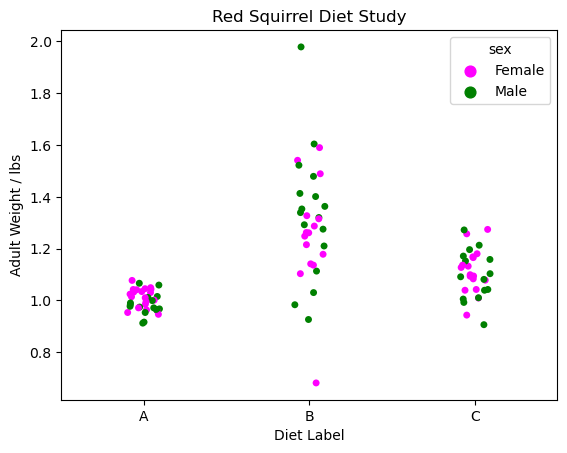

In [7]:
fig = sns.stripplot(x='diet', 
              y='weight', 
              hue='sex',
              hue_order=genders.keys(),
              palette={0:'magenta', 1:'green'}, 
              data=df_squirrels,
              )

# Set the correct title and labels
fig.set(xlabel=x_lab, ylabel=y_lab, title=title)

# Set the correct legend
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, genders.values(), title='sex')

# Set the correct labels for the x axis
# [0, 1, 2] refers to tick positions, not to the diet keys.
# fig.set_xticks([0, 1, 2], labels=diets.values()); # Throws an exception in older versions
fig.set_xticks([0, 1, 2])
fig.set_xticklabels(diets.values());


## Charting in Plotly

Let's see how the strip plot looks like in plotly.

In [8]:
fig = px.strip(df_squirrels, x='diet', y='weight', color='sex')
fig.show()

The y axis range of values is correct, and so is the general distribution of the datapoints. We need to:
- fix the size of the chart, it should be more compact
- change the axes labels
- add the title
- color the dots correctly
- get the different colored dots to form single columns for each category
- format the legend
- change the style to a white background and black outlines

In [9]:
title = 'Red Squirrel Diet Study'
labels = {'diet':'Diet Label',
          'weight': 'Adult Weight / lbs'}
cat_order = {'diet':[1, 2, 3]}
colors = {0:'magenta', 1:'green'}
width_px = 567
height_px = 453
legend_labels = {0: 'Female', 1: 'Male'}
x_tick_labels = {1: 'A', 2: 'B', 3: 'C'}


In [10]:
fig = px.strip(df_squirrels,
               x='diet',
               y='weight',
               color='sex',
               color_discrete_map=colors,
               title=title,
               labels=labels,
               category_orders=cat_order,
               stripmode='overlay',
               width=width_px,
               height=height_px,
               template='simple_white'
               )

# Center title
fig.update_layout(title=dict(x=0.5, y=0.85))

# Change the legend properties
fig.update_layout(legend_title_text='        sex', # The extra spaces position the title closer to the center
                  legend={'x':0.78,
                          'y':0.98,
                          'bordercolor': 'lightgrey',
                          'borderwidth': 1
                          }
                 )

# Fix the legend labels by changing the name of each trace
for trace in fig.data:
    trace.name = legend_labels[int(trace.name)]

# Change the x_ticks to ABC
fig.update_xaxes(tickvals=list(x_tick_labels.keys()),
                 ticktext=list(x_tick_labels.values()))

fig.show()